<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

### Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

#### For the "Median value of owner-occupied homes" provide a boxplot

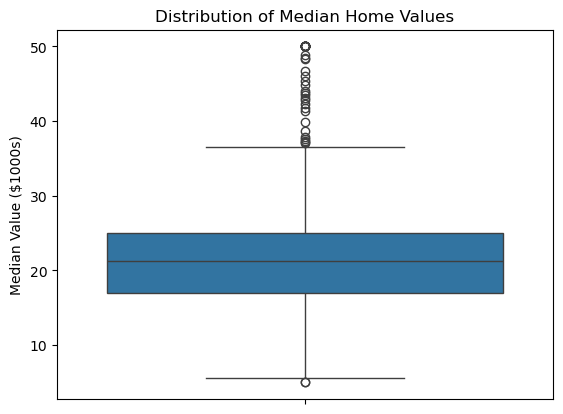

In [82]:
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Distribution of Median Home Values')
plt.ylabel('Median Value ($1000s)')
plt.show()

#### Provide a  bar plot for the Charles river variable

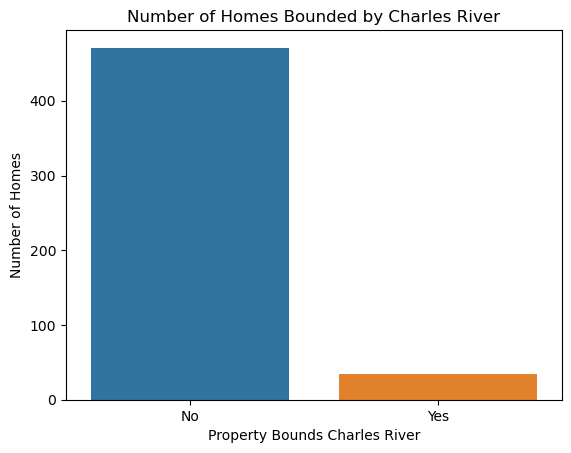

In [84]:
charles_counts = boston_df['CHAS'].value_counts().reset_index()
charles_counts.columns = ['Bounds Charles River', 'Count']
charles_counts['Bounds Charles River'] = charles_counts['Bounds Charles River'].map({0: 'No', 1: 'Yes'})
sns.barplot(x='Bounds Charles River', y='Count', hue='Bounds Charles River', data=charles_counts)
plt.title('Number of Homes Bounded by Charles River')
plt.xlabel('Property Bounds Charles River')
plt.ylabel('Number of Homes')
plt.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

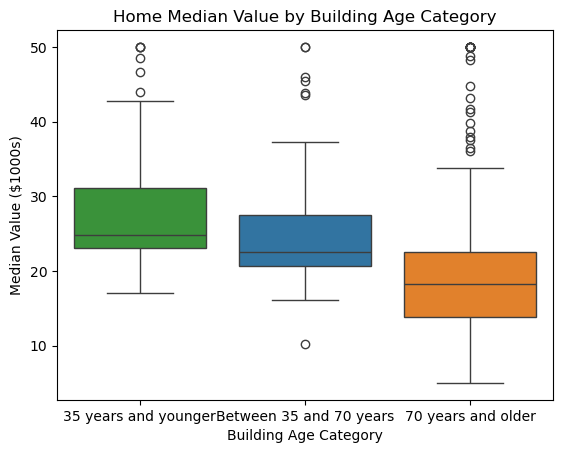

In [85]:
def categorize_age(age):
    if age <= 35:
        return '35 years and younger'
    elif age <= 70:
        return 'Between 35 and 70 years'
    else:
        return '70 years and older'
df_plot = boston_df.copy()
df_plot['AGE_Category'] = df_plot['AGE'].apply(categorize_age)
sns.boxplot(x='AGE_Category', y='MEDV', hue='AGE_Category', data=df_plot, order=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])
plt.title('Home Median Value by Building Age Category')
plt.xlabel('Building Age Category')
plt.ylabel('Median Value ($1000s)')
plt.show()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

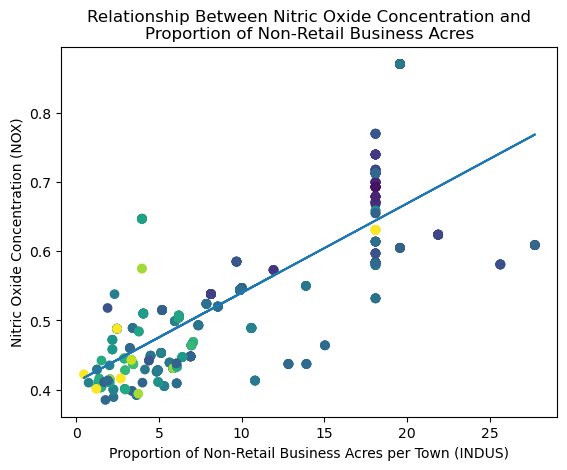

In [86]:
scatter = plt.scatter(boston_df['INDUS'],boston_df['NOX'],c=boston_df['MEDV'])
z = np.polyfit(boston_df['INDUS'], boston_df['NOX'], 1)
p = np.poly1d(z)
plt.plot(boston_df['INDUS'], p(boston_df['INDUS']))
plt.title('Relationship Between Nitric Oxide Concentration and\nProportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

There is a strong positive linear relationship between the proportion of non-retail business acres and Nitric Oxide concentration. Towns with more industrial or commercial land tend to have higher NOX pollution. However, variability at higher industrial proportions suggests other environmental or demographic factors may also play a role.

#### Create a histogram for the pupil to teacher ratio variable

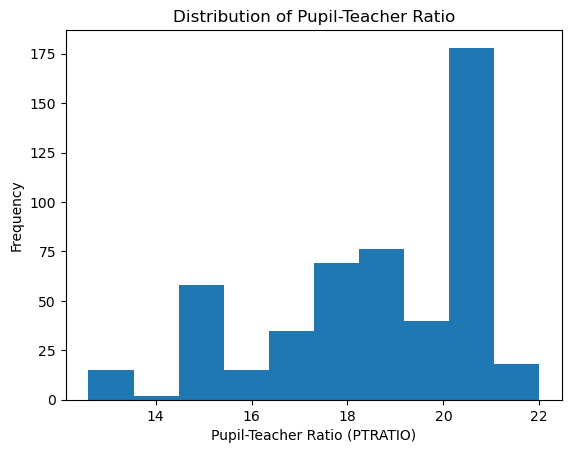

In [87]:
plt.hist(boston_df['PTRATIO'])
mean_ptratio = boston_df['PTRATIO'].mean()
plt.title('Distribution of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

### Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [57]:
print("Hypothesis: There is a statistically significant difference in median house values between properties bounded by the Charles River and those that are not.\n")
river_properties = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_river_properties = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(river_properties, non_river_properties, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}\n")
if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in median house values between properties bounded by the Charles River and those that are not.")
else:
    print("Conclusion: There is no statistically significant difference in median house values between properties bounded by the Charles River and those that are not.")

Hypothesis: There is a statistically significant difference in median house values between properties bounded by the Charles River and those that are not.

T-statistic: 3.113291312794837
P-value: 0.0035671700981375174

Conclusion: There is a statistically significant difference in median house values between properties bounded by the Charles River and those that are not.


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [90]:
print("Hypothesis: There is a statistically significant difference in median house values across different age categories.\n")
boston_df['AGE_Category'] = pd.qcut(boston_df['AGE'], 4, labels=['Newest', 'Newer', 'Older', 'Oldest'])
age_medv_stats = boston_df.groupby('AGE_Category', observed=False)['MEDV'].agg(['mean', 'median', 'std', 'count'])
print("Summary statistics for MEDV by AGE category:")
print(age_medv_stats)
age_groups = [boston_df[boston_df['AGE_Category'] == cat]['MEDV'] for cat in boston_df['AGE_Category'].unique()]
f_stat, p_value = stats.f_oneway(*age_groups)
print(f"\nANOVA results:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}\n")
if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in median house values across different age categories.")
else:
    print("Conclusion: There is no statistically significant difference in median house values across different age categories.")

Hypothesis: There is a statistically significant difference in median house values across different age categories.

Summary statistics for MEDV by AGE category:
                   mean  median       std  count
AGE_Category                                    
Newest        27.080315   24.70  7.312123    127
Newer         24.523016   22.45  7.491042    126
Older         21.209524   19.55  9.428140    126
Oldest        17.323622   15.00  9.369602    127

ANOVA results:
F-statistic: 31.638267058592948
P-value: 9.566925102413718e-19

Conclusion: There is a statistically significant difference in median house values across different age categories.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [53]:
print("Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.\n")
correlation, p_value = stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f"Pearson correlation coefficient: {correlation:}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print(f"The correlation is statistically significant (p < {alpha}).\n")
    if correlation > 0:
        strength = "positive"
    else:
        strength = "negative"
    print("Conclusion: We can reject the null hypothesis that there is no relationship between these variables.")
else:
    print(f"The correlation is not statistically significant (p > {alpha}).\n")
    print("Conclusion: We cannot reject the null hypothesis that there is no relationship between these variables.")

Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Pearson correlation coefficient: 0.763651446920915
P-value: 7.913361061241263e-98
The correlation is statistically significant (p < 0.05).

Conclusion: We can reject the null hypothesis that there is no relationship between these variables.


#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [54]:
print("Hypothesis: The impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes is statistically significant.\n")
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print(model.summary())
if model.pvalues.iloc[1] < 0.05:
    print("\nConclusion: The impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes is statistically significant.")
else:
    print("\nConclusion: The impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes is not statistically significant.")

Hypothesis: The impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        23:51:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err       